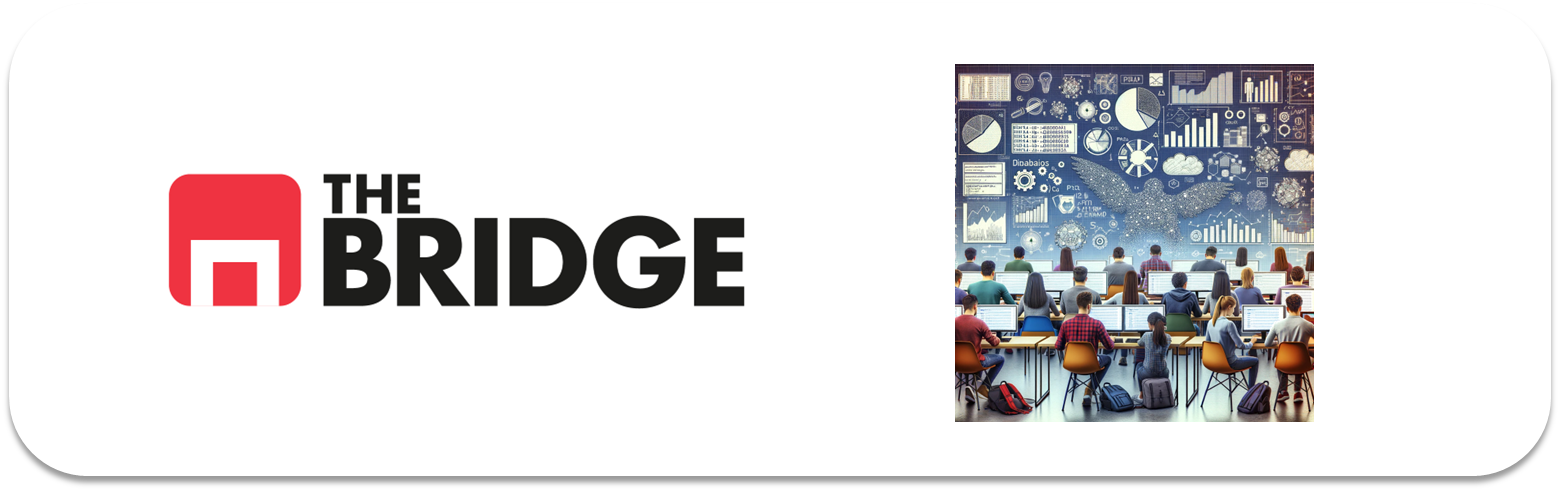

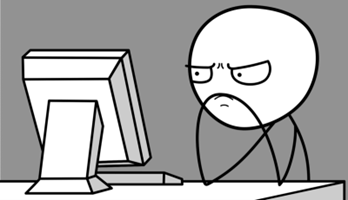

Para ejercitarte y afianzar lo aprendido sobre **Proceso de Datos**, como primera etapa de ML, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Ejercicio 1

Carga el dataset de advertising que encontrarás en la carpeta de datos. Muestra su información general. ¿Qué te llama la atención? ¿Tendremos que limpiar alguna variable?

In [2]:
df_advertising = pd.read_csv('./data/advertising_ml.csv')

In [3]:
df_advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   object 
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 78.2+ KB


In [4]:
df_advertising.sample(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
420,34.30,41 years,53167.68,160.74,Re-contextualized reciprocal interface,West Melaniefurt,1,Libyan Arab Jamahiriya,2016-05-16 14:50:22,1
373,41.73,47 años,60812.77,144.71,Proactive client-server productivity,Andersonchester,0,Cote d'Ivoire,2016-04-08 22:48:25,1
136,38.37,36 años,41229.16,140.46,Multi-layered user-facing paradigm,East John,0,Antarctica (the territory South of 60 deg S),2016-05-13 06:09:28,1
60,85.61,27 años,47708.42,183.43,Customer-focused empowering ability,Lake Amy,0,Burundi,2016-04-30 08:07:13,0
431,88.89,35 years,50439.49,218.80,Balanced 4thgeneration success,East Deborahhaven,1,Cook Islands,2016-07-17 18:55:38,0


In [5]:
# podriamos pasar a datetime la columna de fecha
# podriamos pasar la columna age a numerica y limpiarla

In [6]:
df_advertising['Timestamp'] = pd.to_datetime(df_advertising['Timestamp'])

In [9]:
df_advertising['Age'] = df_advertising['Age'].str.replace(r'años|years', '', regex=True).astype('int')

In [11]:
df_advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 78.2+ KB


### Ejercicio 2

Tenemos que entender el problema antes de seguir. Nos dicen que la compañía "QuickRespond" quiere poder generar un modelo que a partir de datos como los del dataset para poder dirigir mejor su campaña de anuncios. Hablando con ellos llegamos a la conclusión de que queremos un modelo para poder predecir si un usuario pulsará en el link de un anuncio o no. ¿Qué tipo de problemas estamos tratando?¿Y de que tipo de aprendizaje?¿Existe una variable target que puedas identificar rapidamente?

- Si un usuario clicará o no
- es supervisado
- "Clicked on Ad"

### Ejercicio 3

Volvamos ya a los datos. Intenta dar una definicón de cada columna, obten su cardinalidad y en función de esta y del tipo de variable de pandas, clasifícalas en categóricas y numéricas.

In [12]:
df_advertising.sample(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
223,60.94,41,76893.84,154.97,Fundamental fault-tolerant neural-net,Garciaview,0,Latvia,2016-02-14 07:30:24,1
685,76.27,27,60082.66,226.69,Total coherent superstructure,Laurieside,1,United Arab Emirates,2016-06-18 01:42:37,0
509,79.36,33,62330.75,234.72,Cross-platform directional intranet,East Susanland,1,Gambia,2016-01-02 04:50:44,0
37,65.82,39,76435.30,221.94,Reactive demand-driven capacity,Kellytown,0,Ukraine,2016-02-09 05:28:18,0
908,56.91,50,21773.22,146.44,Team-oriented executive core,West Randy,0,Norfolk Island,2016-04-01 05:17:28,1


In [16]:
tipificacion = pd.DataFrame([df_advertising.nunique(), df_advertising.nunique()/len(df_advertising)*100, df_advertising.dtypes]).T.rename(columns = {0:'Card', 1:'%_Card', 2:'Tipo'})
tipificacion

,Card,%_Card,Tipo
Daily Time Spent on Site,900,90.0,float64
Age,43,4.3,int64
Area Income,1000,100.0,float64
Daily Internet Usage,966,96.6,float64
Ad Topic Line,1000,100.0,object
City,969,96.9,object
Male,2,0.2,int64
Country,237,23.7,object
Timestamp,1000,100.0,datetime64[ns]
Clicked on Ad,2,0.2,int64


In [18]:
tipificacion['Clasificada_como'] = 'Categorica'
tipificacion.loc[tipificacion.Card == 2, 'Clasificada_como'] = 'Binaria'
tipificacion.loc[tipificacion.Card > 10, 'Clasificada_como'] = 'Numerica Discreta'
tipificacion.loc[tipificacion['%_Card'] > 30, 'Clasificada_como'] = 'Numerica Continua'
tipificacion

,Card,%_Card,Tipo,Clasificada_como
Daily Time Spent on Site,900,90.0,float64,Numerica Continua
Age,43,4.3,int64,Numerica Discreta
Area Income,1000,100.0,float64,Numerica Continua
Daily Internet Usage,966,96.6,float64,Numerica Continua
Ad Topic Line,1000,100.0,object,Numerica Continua
City,969,96.9,object,Numerica Continua
Male,2,0.2,int64,Binaria
Country,237,23.7,object,Numerica Discreta
Timestamp,1000,100.0,datetime64[ns],Numerica Continua
Clicked on Ad,2,0.2,int64,Binaria


### Ejercicio 4

Limpia las columnas que necesiten ser limpiadas, no completes nulos (porque asignar valores a nulos sólo puedes hacerlo primero con el train, ya explicaremos con detalle por qué). 

In [19]:
# hecho arriba

In [20]:
df_advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 78.2+ KB


In [21]:
df_advertising.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,2016-04-10 10:34:06.636000256,0.50000
min,32.600000,19.000000,13996.500000,104.780000,0.000000,2016-01-01 02:52:10,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,2016-02-18 02:55:42,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,2016-04-07 17:27:29.500000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,2016-05-31 03:18:14,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,2016-07-24 00:22:16,1.00000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,NaN,0.50025


### Ejercicio 5

Divide el datset en train y test, empleando sklearn para ello tal y como hemos hecho en el workout. Usa la regla del 80-20

In [22]:
train_set, test_set = train_test_split(df_advertising, test_size = 0.2, random_state = 42)

In [23]:
len(train_set)

800

In [24]:
len(test_set)

200

### Ejercicio 6

Haz un pequeño análisis univariante de las columnas numéricas (muestra sus histogramas)

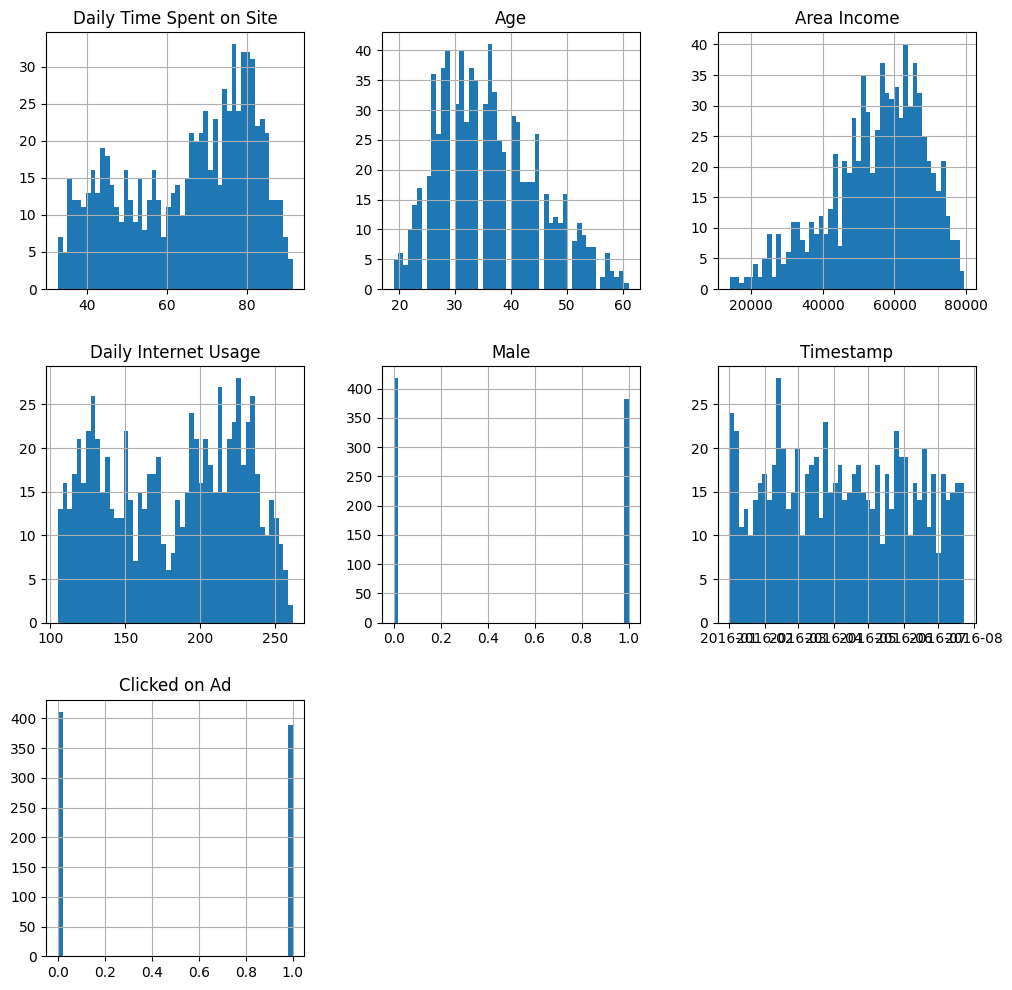

In [34]:
train_set.hist(bins=50, figsize=(12,12))
plt.show()

### Ejercicio 7

Muestra las correlaciones de las variables continuas con un "PairPlot" y emplea como codigo de color la variable target. [Esto es otra forma de hacer un bivariante y un multivariante a la vez]. Para ello como argumento del pairplot de seaborn usa el dataframe de train (no la matriz de correlación)

In [38]:
correlacion = train_set.corr(numeric_only = True)
correlacion['Daily Time Spent on Site'].sort_values(ascending=False)

Daily Time Spent on Site    1.000000
Daily Internet Usage        0.538092
Area Income                 0.310189
Male                       -0.029358
Age                        -0.324499
Clicked on Ad              -0.745492
Name: Daily Time Spent on Site, dtype: float64

In [39]:
columnas = correlacion['Daily Time Spent on Site'][correlacion['Daily Time Spent on Site'] > 0.07].index.to_list()
columnas

['Daily Time Spent on Site', 'Area Income', 'Daily Internet Usage']

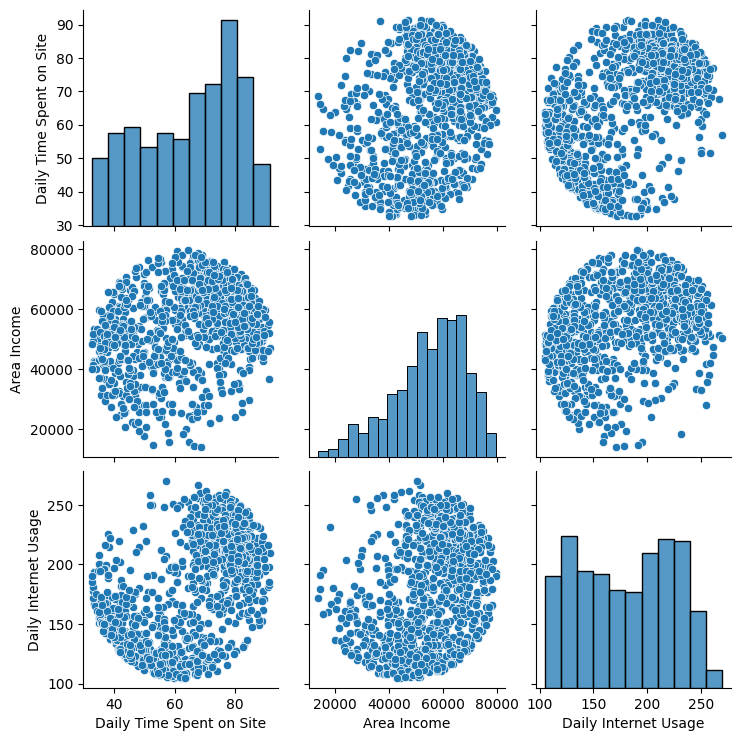

In [42]:
sns.pairplot(df_advertising[columnas]);

### Ejercicio 8

Fijándote en la diagonal principal del gráfico anterior haz una selecció de features:

#### Features
- Daily Time Spent on Site    
- Daily Internet Usage        
- Area Income
- Age
#### Target
- Clicked on Ad